1.  Cree una variable dicotómica por cada una de las categorías de la variable respuesta categórica que creó 
en hojas anteriores. Debería tener 3 variables dicotómicas (valores 0 y 1) una que diga si la vivienda es 
cara o no, media o no, económica o no. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

In [3]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Crear PriceCategory
df['PriceCategory'] = pd.qcut(df['SalePrice'], q=3, labels=['Económica', 'Intermedia', 'Cara'])

In [5]:
# Crear variables dicotómicas a partir de PriceCategory
df['es_economica'] = (df['PriceCategory'] == 'Económica').astype(int)
df['es_intermedia'] = (df['PriceCategory'] == 'Intermedia').astype(int)
df['es_cara'] = (df['PriceCategory'] == 'Cara').astype(int)

2. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores. 

In [6]:
# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['es_cara']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo KNN para regresión
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)

# Predicción en conjunto de prueba
y_pred = knn.predict(X_test) 

3. Elabore un modelo de regresión logística para conocer si una vivienda es cara o no, utilizando el conjunto 
de entrenamiento y explique los resultados a los que llega. El experimento debe ser reproducible por lo 
que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el 
código. Use validación cruzada

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Crear el pipeline con más iteraciones
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000)  # Aumentar el límite
)

# Validación cruzada
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Entrenar el modelo con todo el conjunto
pipeline.fit(X_train, y_train)

# Mostrar resultados
print(f"Exactitud media con validación cruzada: {scores.mean():.4f}")

Exactitud media con validación cruzada: 0.9144


4.  Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan al 
modelo, por su valor de significación. Haga un análisis de correlación de las variables del modelo y 
especifique si el modelo se adapta bien a los datos.  

In [8]:
import statsmodels.api as sm

# Agregamos una columna de constante (bias)
X_train_const = sm.add_constant(X_train)

# Entrenamos modelo logístico con statsmodels
modelo_sm = sm.Logit(y_train, X_train_const).fit()

# Mostramos resumen
modelo_sm.summary()


Optimization terminated successfully.
         Current function value: 0.245761
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                es_cara   No. Observations:                 1168
Model:                          Logit   Df Residuals:                     1161
Method:                           MLE   Df Model:                            6
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.6138
Time:                        20:55:06   Log-Likelihood:                -287.05
converged:                       True   LL-Null:                       -743.22
Covariance Type:            nonrobust   LLR p-value:                8.089e-194
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -81.4897     11.924     -6.834      0.000    -104.860     -58.120
OverallQual     1.1105      0.146      7.616      0.000       0.825       1.396
GrLivArea       0.0039      0.000      9.262      0.000       0.003       0.005
GarageCars      0.5890      0.286      2.061      0.039       0.029       1.149
TotalBsmtSF     0.0015      0.000      4.830      0.000       0.001       0.002
YearBuilt       0.0329      0.006      5.374      0.000       0.021       0.045
FullBath       -0.4137      0.318     -1.301      0.193      -1.037       0.210
===============================================================================
"""

Todas las variables, excepto FullBath, son estadísticamente significativas (p < 0.05).

FullBath tiene un p-valor de 0.193. Se puede considerar eliminarla en futuras pruebas si querés simplificar el modelo.

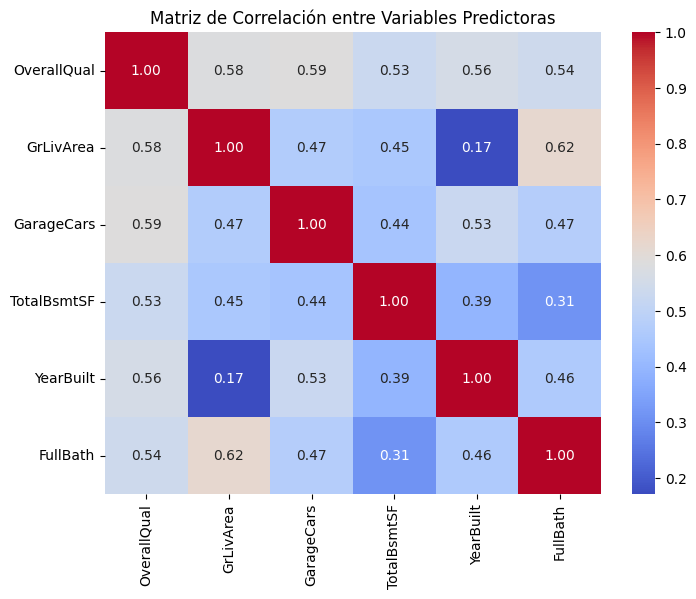

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlacion = X_train.corr()

# Graficamos el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Predictoras")
plt.show()


Las correlaciones más altas son: GrLivArea y FullBath: 0.62, OverallQual y GarageCars: 0.59. Ninguna supera 0.8, lo cual es un umbral típico para preocuparse por multicolinealidad severa.


No se detecta multicolinealidad fuerte.

El modelo es estable y bien especificado en cuanto a las relaciones entre variables predictoras.

Pseudo R² = 0.6138. Muy buen ajuste para regresión logística (no es como el R² clásico, pero valores >0.4 son sólidos).

Exactitud media con validación cruzada = 0.9144 . Implica alto desempeño predictivo.

El modelo está bien balanceado entre interpretabilidad y rendimiento.

5. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar.


Exactitud del modelo en el conjunto de prueba: 0.9247

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       198
           1       0.89      0.87      0.88        94

    accuracy                           0.92       292
   macro avg       0.92      0.91      0.91       292
weighted avg       0.92      0.92      0.92       292



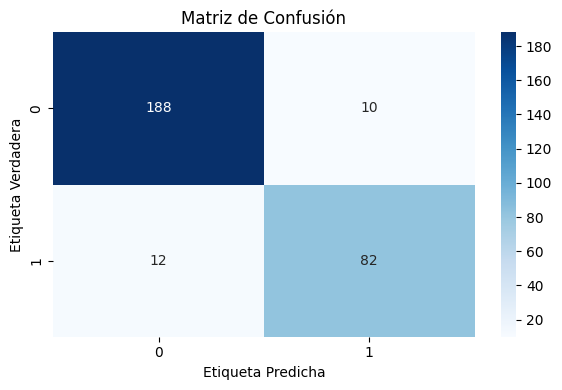

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Predecir en el conjunto de prueba
y_pred_test = pipeline.predict(X_test)

# Paso 2: Calcular métricas de eficiencia
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy:.4f}")

# Reporte detallado por clase
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_test))

# Paso 3: Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.tight_layout()
plt.show()


El modelo de regresión logística evaluado sobre el conjunto de prueba alcanzó una exactitud del 92.47%, lo que indica un buen desempeño general en la clasificación de viviendas como caras o no. El reporte de clasificación muestra una precisión del 94% y un recall del 95% para la clase 0 (no cara), y 89% de precisión y 87% de recall para la clase 1 (cara). Esto indica que el modelo es ligeramente mejor clasificando viviendas no caras, lo cual es comprensible si existe un desbalance entre clases. La matriz de confusión confirma estos resultados: de 198 viviendas no caras, 188 fueron correctamente clasificadas, y de 94 viviendas caras, 82 fueron correctamente identificadas. Solo se cometieron 22 errores de clasificación en total (10 falsos positivos y 12 falsos negativos). En conjunto, los resultados sugieren que el modelo logra una buena generalización sobre datos no vistos, con un compromiso equilibrado entre precisión y sensibilidad.

6. Explique si hay sobreajuste (overfitting) o no (recuerde usar para esto los errores del conjunto de prueba
y de entrenamiento). Muestre las curvas de aprendizaje usando los errores de los conjuntos de
entrenamiento y prueba.

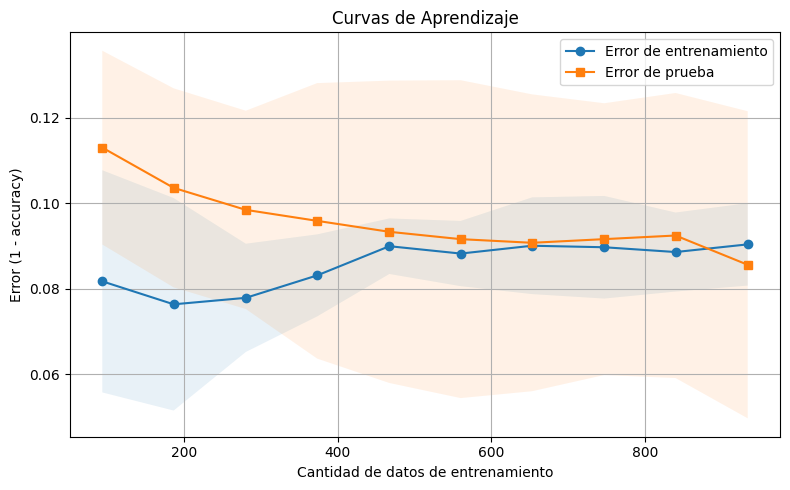

In [11]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Crear learning curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=42
)

# Calcular medias y desviaciones estándar
train_mean = 1 - np.mean(train_scores, axis=1)  # error = 1 - accuracy
test_mean = 1 - np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Error de entrenamiento", marker='o')
plt.plot(train_sizes, test_mean, label="Error de prueba", marker='s')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Cantidad de datos de entrenamiento")
plt.ylabel("Error (1 - accuracy)")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Las curvas de aprendizaje permiten evaluar si el modelo presenta sobreajuste. En este caso, se observa que los errores de entrenamiento y prueba convergen a valores similares conforme aumenta el tamaño del conjunto de entrenamiento. El error de prueba comienza siendo mayor, pero disminuye progresivamente y se estabiliza en torno al 8%, mientras que el error de entrenamiento también se mantiene bajo y cercano al mismo valor. Esta convergencia sugiere que no hay evidencia de sobreajuste. Además, la brecha entre ambos errores es pequeña, lo cual indica que el modelo generaliza adecuadamente. Por lo tanto, el modelo de regresión logística no memoriza los datos de entrenamiento y logra un buen balance entre ajuste y generalización.